## Import dependencies and read csv

In [15]:
import pandas as pd
import tensorflow as tf
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import graphviz
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [16]:
dm_df = pd.read_csv(Path("Resources/diabetes_indicators.csv"), encoding="UTF-8")
dm_df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


## NN_MODEL_1 - baseline

In [28]:
# Remove Diabetes_012 target from features data on original data set
y = dm_df.Diabetes_012.values.reshape(-1, 1)
X = dm_df.drop(columns=["Diabetes_012"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [29]:
 #Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=21))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
5946/5946 [==============================] - 6s 983us/step - loss: 0.3443 - accuracy: 0.7146
Epoch 2/50
5946/5946 [==============================] - 6s 985us/step - loss: 0.0624 - accuracy: 0.7248
Epoch 3/50
5946/5946 [==============================] - 6s 973us/step - loss: -0.9798 - accuracy: 0.7238
Epoch 4/50
5946/5946 [==============================] - 6s 948us/step - loss: -3.3340 - accuracy: 0.7189
Epoch 5/50
5946/5946 [==============================] - 6s 932us/step - loss: -7.4454 - accuracy: 0.7164
Epoch 6/50
5946/5946 [==============================] - 6s 963us/step - loss: -13.8357 - accuracy: 0.7137
Epoch 7/50
5946/5946 [==============================] - 6s 978us/step - loss: -22.7693 - accuracy: 0.7109
Epoch 8/50
5946/5946 [==============================] - 6s 995us/step - loss: -34.8343 - accuracy: 0.7086
Epoch 9/50
5946/5946 [==============================] - 6s 966us/step - loss: -50.4080 - accuracy: 0.7068
Epoch 10/50
5946/5946 [==============================

## NN_MODEL_2 with reduced features
### Removed "No doctor visits because of cost" column

In [43]:
# Remove Diabetes_012 target from features data on original data set
y = dm_df.Diabetes_012.values.reshape(-1, 1)
X = dm_df.drop(columns=["Diabetes_012","NoDocbcCost"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [44]:
 #Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=20))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=25)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/25
5946/5946 [==============================] - 6s 968us/step - loss: 0.3431 - accuracy: 0.7130
Epoch 2/25
5946/5946 [==============================] - 6s 990us/step - loss: 0.1207 - accuracy: 0.7215
Epoch 3/25
5946/5946 [==============================] - 6s 1ms/step - loss: -0.6000 - accuracy: 0.7271
Epoch 4/25
5946/5946 [==============================] - 6s 931us/step - loss: -2.2788 - accuracy: 0.7319
Epoch 5/25
5946/5946 [==============================] - 6s 970us/step - loss: -5.3489 - accuracy: 0.7252
Epoch 6/25
5946/5946 [==============================] - 6s 965us/step - loss: -10.3764 - accuracy: 0.7234
Epoch 7/25
5946/5946 [==============================] - 6s 997us/step - loss: -17.5813 - accuracy: 0.7198
Epoch 8/25
5946/5946 [==============================] - 6s 958us/step - loss: -27.4849 - accuracy: 0.7184
Epoch 9/25
5946/5946 [==============================] - 6s 970us/step - loss: -40.6833 - accuracy: 0.7188
Epoch 10/25
5946/5946 [==============================] 

## Cleaning data
### Note: can we remove `1` instead of combining with `2`? Since `1` is pre-diabetes, it blends the groups and lowers accuracy.

In [17]:
# CREATE COPY FOR CLEANING
di_df = dm_df.copy()

# CONVERTING DTYPES TO INT FOR EASIER DATA MANIPULATION
di_df = di_df.astype(int)

# SIMPLIFYING TARGET COLUMN TO ONLY 0 (no diabetes) AND 1 (diabetes)
di_df = di_df.loc[(di_df["Diabetes_012"] != 1), :]
di_df["Diabetes_012"] = di_df["Diabetes_012"].replace(2,1)

# SHOW DATAFRAME
di_df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,1,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


In [18]:
# EXPORT CLEANED DATAFRAME TO CSV
di_df.to_csv('Resources/diabetes_indicators_clean.csv', index=False)

## Train-test-split and StandardScaler

In [32]:
# Remove Diabetes_012 target from features data on original data set
y = di_df["Diabetes_012"]
X = di_df.drop(columns="Diabetes_012")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [33]:
# Preprocess numerical data for neural network

# CREATING STANDARDSCALER INSTANCE
scaler = StandardScaler()

# FITTING DATA
X_scaler = scaler.fit(X_train)

# SCALING THE DATA
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## NN_MODEL_3 with cleaned data

In [23]:
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=21))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
5838/5838 [==============================] - 6s 966us/step - loss: 0.3218 - accuracy: 0.8616
Epoch 2/50
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3146 - accuracy: 0.8647
Epoch 3/50
5838/5838 [==============================] - 6s 969us/step - loss: 0.3137 - accuracy: 0.8649
Epoch 4/50
5838/5838 [==============================] - 6s 976us/step - loss: 0.3131 - accuracy: 0.8653
Epoch 5/50
5838/5838 [==============================] - 6s 989us/step - loss: 0.3127 - accuracy: 0.8655
Epoch 6/50
5838/5838 [==============================] - 6s 965us/step - loss: 0.3125 - accuracy: 0.8656
Epoch 7/50
5838/5838 [==============================] - 6s 967us/step - loss: 0.3123 - accuracy: 0.8659
Epoch 8/50
5838/5838 [==============================] - 6s 947us/step - loss: 0.3121 - accuracy: 0.8659
Epoch 9/50
5838/5838 [==============================] - 6s 953us/step - loss: 0.3121 - accuracy: 0.8660
Epoch 10/50
5838/5838 [==============================] - 6s 977us/

In [24]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3118 - accuracy: 0.8656 - 1s/epoch - 707us/step
Loss: 0.3117768466472626, Accuracy: 0.86555415391922


## KerasTuner

In [34]:
# KERASTUNER - AUTOTUNER FUNCTION
def create_model(hp):
    nn_model = tf.keras.models.Sequential()
    activation = hp.Choice('activation',['relu','tanh'])
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=21))

    for i in range(hp.Int('num_layers', 1, 4)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5), activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return nn_model

In [36]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=15,
    hyperband_iterations=2
)

Reloading Tuner from .\untitled_project\tuner0.json


In [37]:
# KERASTUNER SEARCHING FOR BEST PARAMETERS
tuner.search(X_train_scaled, y_train, epochs=15, validation_data=(X_test_scaled, y_test))

In [38]:
# TOP 2 PARAMETERS
top_hyper = tuner.get_best_hyperparameters(2)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 26, 'num_layers': 4, 'units_0': 26, 'units_1': 1, 'units_2': 1, 'units_3': 26, 'units_4': 21, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 21, 'num_layers': 1, 'units_0': 21, 'units_1': 1, 'units_2': 21, 'units_3': 6, 'units_4': 26, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0042'}


## NN_MODEL_4 testing top model

In [39]:
num_input_features = 21
hidden_nodes_layer1 = 26
hidden_nodes_layer2 = 1
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 26
hidden_nodes_layer5 = 21

nn = tf.keras.models.Sequential()

nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=num_input_features, activation='tanh')
)

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='tanh'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='tanh'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation='tanh'))

nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 26)                572       
                                                                 
 dense_19 (Dense)            (None, 1)                 27        
                                                                 
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
 dense_21 (Dense)            (None, 26)                52        
                                                                 
 dense_22 (Dense)            (None, 21)                567       
                                                                 
 dense_23 (Dense)            (None, 1)                 22        
                                                                 
Total params: 1242 (4.85 KB)
Trainable params: 1242 (4

In [40]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3290 - accuracy: 0.8579
Epoch 2/25
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3192 - accuracy: 0.8618
Epoch 3/25
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3168 - accuracy: 0.8639
Epoch 4/25
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3157 - accuracy: 0.8638
Epoch 5/25
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3152 - accuracy: 0.8641
Epoch 6/25
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3149 - accuracy: 0.8645
Epoch 7/25
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3146 - accuracy: 0.8645
Epoch 8/25
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3140 - accuracy: 0.8645
Epoch 9/25
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3139 - accuracy: 0.8646
Epoch 10/25
5838/5838 [==============================] - 7s 1ms/step - loss: 0.313

In [42]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 2s - loss: 0.3143 - accuracy: 0.8648 - 2s/epoch - 1ms/step
Loss: 0.31429213285446167, Accuracy: 0.8647511601448059


## Setting up Random Forest Model

In [46]:
# Define features and target vectors

X = di_df.copy()
X.drop("Diabetes_012", axis=1, inplace=True)

y= di_df["Diabetes_012"].values.reshape(-1,1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [47]:
#Splitting into Train and Test sets
#Create Standardscaler
#Fitting Standard Scaler
#Scaling Data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Create a random forest classifier
# Fitting the model

rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\leahl\AppData\Local\Temp\ipykernel_14104\3783885359.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [49]:
# Making predictions using the testing data

predictions = rf_model.predict(X_test_scaled)

In [50]:
# Making predictions using the testing data

predictions = rf_model.predict(X_test_scaled)
# Calculating the confusion matrix
# Calculating the accuracy score
# Displaying results

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)


acc_score = accuracy_score(y_test, predictions)


print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,51915,1608
Actual 1,7032,1708


Accuracy Score : 0.8612337985641553
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     53523
           1       0.52      0.20      0.28      8740

    accuracy                           0.86     62263
   macro avg       0.70      0.58      0.60     62263
weighted avg       0.83      0.86      0.83     62263



In [51]:
# Random Forests in sklearn will automatically calculate feature importance
# We can sort the features by their importance

importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.18397201236558688, 'BMI'),
 (0.121655337482562, 'Age'),
 (0.09800224311548976, 'Income'),
 (0.0831341364524484, 'PhysHlth'),
 (0.07368837887281575, 'GenHlth'),
 (0.06867468155113386, 'Education'),
 (0.06303331160531182, 'MentHlth'),
 (0.04369016957104785, 'HighBP'),
 (0.03308616525654203, 'Smoker'),
 (0.032953708597104815, 'Fruits'),
 (0.027794339046286577, 'HighChol'),
 (0.027711313407685158, 'Sex'),
 (0.026029242442430378, 'Veggies'),
 (0.025760927600930787, 'PhysActivity'),
 (0.024474585882474115, 'DiffWalk'),
 (0.01896213642445919, 'HeartDiseaseorAttack'),
 (0.01483634580914272, 'NoDocbcCost'),
 (0.01242859408796072, 'Stroke'),
 (0.008476706220180789, 'AnyHealthcare'),
 (0.007903331487476245, 'HvyAlcoholConsump'),
 (0.0037323327209301572, 'CholCheck')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

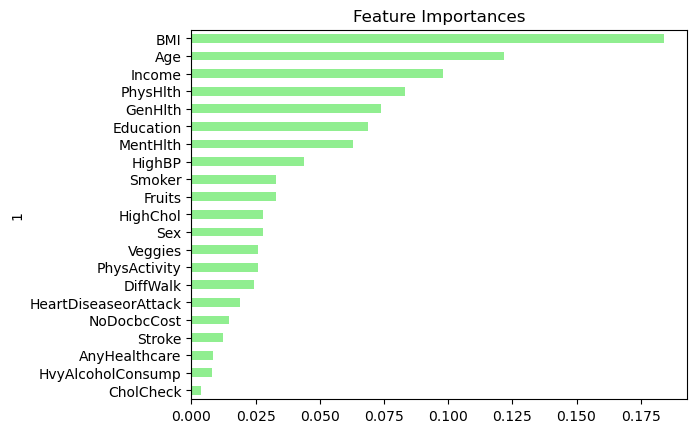

In [53]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Feature Importances', legend=False)

## Random Forest Model 2 using only top 10 features

In [54]:
#RandomForest Model 2 
X = di_df.copy()
X.drop(["Diabetes_012","CholCheck","HvyAlcoholConsump","Stroke","NoDocbcCost","AnyHealthcare","HeartDiseaseorAttack","DiffWalk","PhysActivity","Veggies","HighChol","Sex",], axis=1, inplace=True)

y= di_df["Diabetes_012"].values.reshape(-1,1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [55]:
#Splitting into Train and Test sets
#Create Standardscaler
#Fitting Standard Scaler
#Scaling Data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
# Create a random forest classifier
# Fitting the model

rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data

predictions = rf_model.predict(X_test_scaled)

C:\Users\leahl\AppData\Local\Temp\ipykernel_14104\1499838181.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [57]:
# Calculating the confusion matrix
# Calculating the accuracy score
# Displaying results

cm2 = confusion_matrix(y_test, predictions)
cm_df2 = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)


acc_score = accuracy_score(y_test, predictions)


print("Confusion Matrix")
display(cm_df2)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,51915,1608
Actual 1,7032,1708


Accuracy Score : 0.8483690153060405
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     53523
           1       0.42      0.21      0.28      8740

    accuracy                           0.85     62263
   macro avg       0.65      0.58      0.60     62263
weighted avg       0.82      0.85      0.83     62263



## Blobs?